In [1]:
pip install darts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 83.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17/17 [darts]m16/17 [darts]orecast]

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
import pandas as pd

# Hourly price

data_2023 = [pd.read_csv(f"Data/messari_hourly_prices/hourly_prices_2023_{i}.csv", parse_dates=["datetime"]) for i in range(1, 13)]
data_2024 = [pd.read_csv(f"Data/messari_hourly_prices/hourly_prices_2024_{i}.csv", parse_dates=["datetime"]) for i in range(1, 13)]
df1 = pd.concat(data_2023 + data_2024).sort_values("datetime").set_index("datetime").drop(columns=["Unnamed: 0"])

df1 = df1.reset_index()
df1_btc = df1[df1['reserve_name']=='Wrapped BTC']

# Reserves features

data2_2023 = [pd.read_csv(f"Data/reserves_features/reserves_history_hourly_completed_2023-{i}.csv") for i in range(1, 13)]
data2_2024 = [pd.read_csv(f"Data/reserves_features/reserves_history_hourly_completed_2024-{i}.csv") for i in range(1, 13)]
dfr = pd.concat(data2_2023 + data2_2024).drop(columns=["Unnamed: 0"])

dfr_btc = dfr[dfr['reserve_name']=='Wrapped BTC'].dropna().drop(["totalPrincipalStableDebt"], axis=1)

# Merge

dfr_btc['regular_datetime'] = pd.to_datetime(dfr_btc['regular_datetime'], utc=True)
df_btc = pd.merge(df1_btc, dfr_btc, left_on='datetime', right_on='regular_datetime')
df_btc = df_btc.drop(['blockNumber', 'timestamp_hours', 'id', 'snapshot_timestamp', 
'regular_datetime', 'reserve_name_x', 'reserve_name_y', 'reserve_pool', 'protocol', 'protocol_name', 
'priceInUsd', 'outputTokenPriceUSD', 'averageStableBorrowRate', 'priceInEth', 'reserve_decimals', 
'true_value', 'timestamp'], axis=1)

df_btc = df_btc.sort_values("datetime")
df_btc

,datetime,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate
0,2023-01-27 12:00:00+00:00,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000
1,2023-01-27 13:00:00+00:00,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000
2,2023-01-27 14:00:00+00:00,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000
3,2023-01-27 15:00:00+00:00,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000
4,2023-01-27 16:00:00+00:00,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,2024-12-31 19:00:00+00:00,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809
14019,2024-12-31 20:00:00+00:00,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825
14020,2024-12-31 21:00:00+00:00,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823
14021,2024-12-31 22:00:00+00:00,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851


In [22]:
from darts import TimeSeries

df_btc['datetime'] = df_btc['datetime'].dt.tz_localize(None)
TimeSeries.from_dataframe(df_btc, time_col="datetime", fill_missing_dates=True, freq="h")

<TimeSeries (DataArray) (datetime: 16908, component: 13, sample: 1)> Size: 2MB
array([[[2.29014158e+04],
        [0.00000000e+00],
        [6.19864490e-01],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.28892916e+04],
        [0.00000000e+00],
        [7.68669950e-01],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.28408199e+04],
        [0.00000000e+00],
        [3.44326847e+00],
        ...,
...
        ...,
        [7.54085100e-02],
        [1.02103996e+00],
        [3.82321886e-03]],

       [[9.35127227e+04],
        [3.81204500e-02],
        [3.37469631e+04],
        ...,
        [7.54084800e-02],
        [1.02104068e+00],
        [3.85055447e-03]],

       [[9.32024070e+04],
        [3.81636500e-02],
        [3.37438073e+04],
        ...,
        [7.54161400e-02],
        [1.02104107e+00],
        [3.85094480e-03]]], shape=(16908, 13, 1))
Coordinates:
  * datetime   (datetime) datetime64[ns] 135kB 2023-01-27T12:00:00 ... 2024-1...
  * component  (component) <U24 1kB 'inputTokenPriceUSD' ... 'variableBorrowR...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

Number of series components (13) is larger than the maximum number of components to plot (10). Plotting only the first `10` components. You can adjust the number of components to plot using `max_nr_components`.


<Axes: xlabel='datetime'>

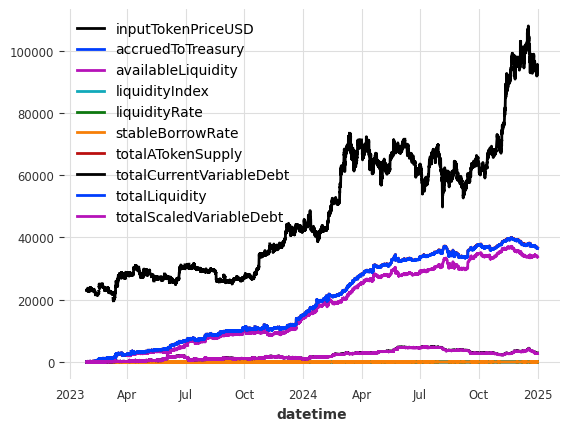

In [26]:
test=TimeSeries.from_dataframe(df_btc, time_col="datetime", fill_missing_dates=True, freq="h")
test.plot()

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.metrics import mape
from darts.models import TFTModel
from darts.utils.likelihood_models.torch import QuantileRegression
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'args' is not defined